In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import seaborn as sns

import sys
sys.path.append("../../")
from rcgfd import ScalingTest

In [25]:
def open_dataset(vname, values):
    dslist = []
    for val in values:
        dslist2 = []
        for sample in range(3):
            st = ScalingTest(**{vname: val, "sample":sample})
            if os.path.isfile(st.fname):
                dslist2.append(st.open_dataset())
            else:
                print(f"can't find {vname} = {val}, sample = {sample}")
        dslist.append(xr.concat(dslist2, dim="sample"))
    return xr.concat(dslist, dim=vname)

In [129]:
def get_linear(xda, dim, sf):
    d = xda[dim]
    d0 = d.isel({dim:0})
    mm = xda.isel({dim:0}).mean("sample")
    b = (sf-1)*mm/sf
    if xda.name == "max_mem":
        linear = mm * d/d0/sf + b
        eqn = r"$y = \dfrac{%.2f}{%d} \dfrac{x}{x_0} + %.2f$" % (float(mm), int(sf), b)
    elif xda.name == "walltime":
        linear = mm / d*d0/sf + b
        eqn = r"$y = \dfrac{%.2f}{%d} \dfrac{x_0}{x} + %.2f$" % (float(mm), int(sf), b)
    linear.attrs["label"] = eqn
    return linear

In [134]:
def simple_plot(xds, dim, plot_linear=True, slope_factor=1, **kwargs):
    
    fig, axs = plt.subplots(1,2, figsize=(10,4))

    kw = {"marker": "o"}
    kw.update(kwargs)

    for fld, ax in zip(["max_mem", "walltime"], axs):
        sns.lineplot(
            data=xds[fld].to_dataset().to_dataframe().reset_index(),
            x=dim,
            y=fld,
            ax=ax,
            errorbar="sd",
            marker='o',
        )
    if plot_linear:
        sf = slope_factor if isinstance(slope_factor, (int, float)) else slope_factor[0]
        linear = get_linear(xds["max_mem"], dim, sf)
        linear.plot(ax=axs[0], color="k", ls="--", label=linear.label)
        
        sf = slope_factor if isinstance(slope_factor, (int, float)) else slope_factor[1]
        linear = get_linear(xds["walltime"], dim, sf)
        linear.plot(ax=axs[1], color="k", ls="--", label=linear.label)

    [ax.legend() for ax in axs]

    return fig, axs

## Batch Size

Memory increases by something like .15 * `batch_size` and walltime basically flattens out after 8*288 = 2,304.

In [138]:
dsb = open_dataset("batch_size", 288*np.array([1,2,8,16,32,64]))

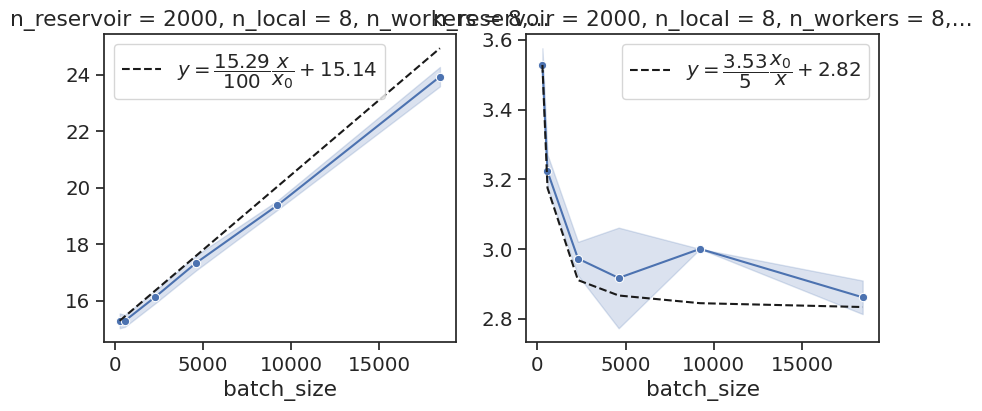

In [139]:
fig, axs = simple_plot(dsb, "batch_size", plot_linear=True, slope_factor=[100, 5])

## Number of workers

In [ ]:
dsw = 

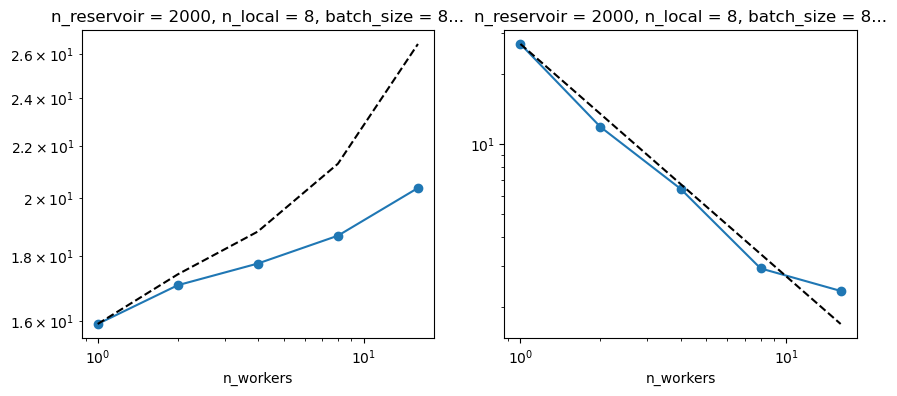

In [10]:

kw = {"marker": "o"}
dsw.max_mem.plot(ax=axs[0], **kw)
c = 50
linear = dsw.max_mem[0] * dsw.n_workers/c + (c-1)*dsw.max_mem[0]/c
linear.plot(ax=axs[0], color='k', ls="--")

dsw.walltime.squeeze().plot(ax=axs[1], yscale="log", **kw)

linear = dsw.walltime.squeeze()[0] / dsw.n_workers
linear.plot(ax=axs[1], color='k', ls="--")

for ax in axs:
    ax.set(
        xticks=np.arange(0, 21, 4),
        yscale="log",
        xscale="log",
    )

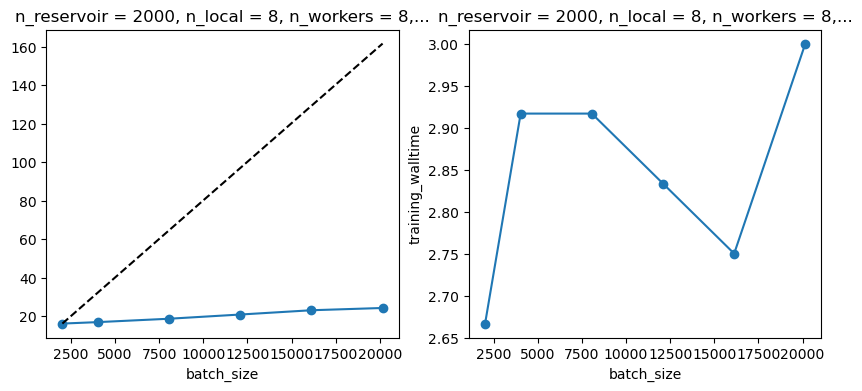

In [23]:
fig, axs = plt.subplots(1,2, figsize=(10,4))

kw = {"marker": "o"}
with xr.set_options(keep_attrs=True):
    max_mem = dsb.training.squeeze().max("minutes")
max_mem.plot(ax=axs[0], **kw)
linear = max_mem[0] * dsb.batch_size/dsb.batch_size[0]
linear.plot(ax=axs[0], color='k', ls="--")

dsb.training_walltime.squeeze().plot(ax=axs[1], **kw)

linear = dsb.training_walltime.squeeze()[0] * dsb.batch_size / dsb.batch_size[0]
#linear.plot(ax=axs[1], color='k', ls="--")

for ax in axs:
    ax.set(
        #yscale="log",
        #xscale="log",
    )

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(10,4))

kw = {"marker": "o"}
with xr.set_options(keep_attrs=True):
    max_mem = dsb.training.squeeze().max("minutes")
max_mem.plot(ax=axs[0], **kw)
linear = max_mem[0] * dsb.batch_size/dsb.batch_size[0]
linear.plot(ax=axs[0], color='k', ls="--")

dsb.training_walltime.squeeze().plot(ax=axs[1], **kw)

linear = dsb.training_walltime.squeeze()[0] * dsb.batch_size / dsb.batch_size[0]
#linear.plot(ax=axs[1], color='k', ls="--")

for ax in axs:
    ax.set(
        #yscale="log",
        #xscale="log",
    )